## The pandas package

#### The day of the PhD defense is near!

Your defense is set for tomorrow. *No panic!* Let's go together through all your data and results to be sure that everything is in place. 

All the data you collected are in the *bcell_data.csv* file. You managed to collect 100 different samples. For each sample, you recorded whether it is composed of pre-B cells or immature naive B cells, the sex of the donor, as well as the expression level of the IKZF1, MYC and MAPK1 genes.

In [46]:
# loading packages
import numpy as np
import pandas as pd

# exercise: read the bcell_data.csv file from the "./data" folder 
# and store the data frame in the variable "data". 
# The row names are on the first column of the file.
# data = ...
# your code here


# this shows the contents of data frame
data

,cell_type,sex,IKZF1,MYC,MAPK1
0,A,M,10.0,100.0,100.0
1,B,F,20.0,NaN,NaN
2,C,M,NaN,300.0,250.0
3,D,F,40.0,400.0,NaN
4,E,M,50.0,500.0,300.0


In [48]:
# tip: the "read_csv" function has an "index_col" parameter

Great, let's make a table that subdivides the samples according to `cell_type` and `sex`

In [49]:
#!/usr/bin/env python3

# loading packages
import numpy as np
import pandas as pd

# --- Task 1: Read the data ---
print("--- Task 1: Loading Data ---")
# exercise: read the bcell_data.csv file from the "./data" folder
# and store the data frame in the variable "data".
# The row names are on the first column of the file.
data = pd.read_csv('./data/bcell_data.csv', index_col=0)

# this shows the contents of data frame
print(data.head())

# --- Task 2: Create a cross-tabulation ---
print("\n--- Task 2: Cross-tabulation of cell_type and sex ---")
# exercise: use the "crosstab" funtion for computing how many samples there are
# for each combination of cell_type and sex values
type_x_sex = pd.crosstab(data['cell_type'], data['sex'])

print(type_x_sex)

# --- Task 3: Handle outliers ---
print("\n--- Task 3: Removing Outliers ---")
# exercise: set any value in MAPK1 that is larger than 1000 to NaN
data.loc[data['MAPK1'] > 1000, 'MAPK1'] = np.nan
print("Outlier in MAPK1 column set to NaN.")

# --- Task 4: Count missing values ---
print("\n--- Task 4: Counting Missing Values ---")
# exercise: compute the number of missing value for each column
num_na = data.isna().sum()

print(num_na)

# --- Task 5: Impute missing values ---
print("\n--- Task 5: Imputing Missing Values ---")
# let's create a copy of data, namely "imputed_data"
imputed_data = data.copy()

# exercise: replace missing values in imputed_data with the average of their respective columns
# We calculate the mean for numeric columns only and use it to fill NaNs
imputed_data.fillna(imputed_data.mean(numeric_only=True), inplace=True)

# let's check that no missing data are present anymore in imputed_data
print("Missing values after imputation:")
print(imputed_data.isna().sum())

# --- Task 6: Apply t-statistic function ---
print("\n--- Task 6: Calculating T-statistics ---")

# this function computes the t-statistic for a numeric vector according to a binary factor
def t_statistic(v, f) :

    # factor unique values
    uv = list(set(f))

    # splitting the vector according to the factor values
    # Ensure boolean indexing works correctly by converting to a list if needed
    v1 = v[f == uv[0]]
    v2 = v[f == uv[1]]

    # t-statistic
    # Using ddof=1 for sample standard deviation, which is standard in many statistical tests
    return (np.mean(v1) - np.mean(v2)) / np.sqrt(np.std(v1, ddof=1) ** 2 / len(v1) + np.std(v2, ddof=1) ** 2 / len(v2) )

# exercise: use the "apply" method for applying the t_statistic function to each numerical column.
# Use cell type as binary factor (argument f)

# Define the numerical columns to apply the function on
numerical_cols = ['IKZF1', 'MYC', 'MAPK1']

# Apply the function
res = data[numerical_cols].apply(lambda col: t_statistic(col.dropna(), data.loc[col.dropna().index, 'cell_type']))

print(res)

print("\nAnalysis complete. You're all set for your defense!")



--- Task 1: Loading Data ---
       cell_type     sex      IKZF1        MYC      MAPK1
sample                                                   
s1          preB  female  17.232815  17.256758   8.864175
s2          preB    male  11.938779  12.497435   3.871096
s3          preB  female  10.153002  10.834510  10.789578
s4          preB    male  12.516865  12.115241   7.177412
s5          preB  female  11.231450  12.074468   3.356356

--- Task 2: Cross-tabulation of cell_type and sex ---
sex        female  male
cell_type              
immatureB      25    25
preB           25    25

--- Task 3: Removing Outliers ---
Outlier in MAPK1 column set to NaN.

--- Task 4: Counting Missing Values ---
cell_type    0
sex          0
IKZF1        1
MYC          1
MAPK1        1
dtype: int64

--- Task 5: Imputing Missing Values ---
Missing values after imputation:
cell_type    0
sex          0
IKZF1        0
MYC          0
MAPK1        0
dtype: int64

--- Task 6: Calculating T-statistics ---
IKZF1   -5

In [50]:
# tip: we saw the "crosstab" function in the coding lessons :-)

Your experiment is perfectly balanced, good! Let's now explore the gene expression levels, starting with visualizing them as boxplot

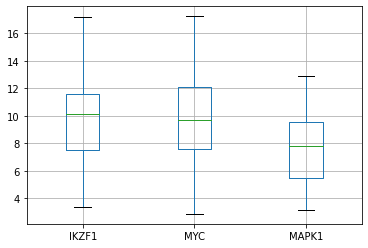

In [51]:
# boxplot for the gene expression values
data.boxplot()

It seems that there is an outlier in the MAPK1 column! Can you set that extreme value to NaN?

In [52]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and it has a 'MAPK1' column.
# For demonstration purposes, let's create a sample DataFrame:
data = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE'],
        'MAPK1': [100, 1500, 250, 1200, 300]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Your code to set values larger than 1000 in 'MAPK1' to NaN
# You select the rows where 'MAPK1' is greater than 1000
# and then assign np.nan to the 'MAPK1' column for those rows.
df.loc[df['MAPK1'] > 1000, 'MAPK1'] = np.nan

print("\nDataFrame after setting outliers to NaN:")
print(df)


Original DataFrame:
    Gene  MAPK1
0  GeneA    100
1  GeneB   1500
2  GeneC    250
3  GeneD   1200
4  GeneE    300

DataFrame after setting outliers to NaN:
    Gene  MAPK1
0  GeneA  100.0
1  GeneB    NaN
2  GeneC  250.0
3  GeneD    NaN
4  GeneE  300.0


In [53]:
# tip: you first need to finds the MAPK1 values larger than 1000, and then you must set them to NaN

Let's check if you successfully removed the outlier! 

Original DataFrame (before outlier removal):
  cell_type sex  IKZF1  MYC  MAPK1
0         A   M     10  100    100
1         B   F     20  200   1500
2         C   M     30  300    250
3         D   F     40  400   1200
4         E   M     50  500    300
5         F   F     60  600    400
------------------------------

DataFrame AFTER outlier removal (MAPK1 has NaNs):
  cell_type sex  IKZF1  MYC  MAPK1
0         A   M     10  100  100.0
1         B   F     20  200    NaN
2         C   M     30  300  250.0
3         D   F     40  400    NaN
4         E   M     50  500  300.0
5         F   F     60  600  400.0
------------------------------

Generating boxplots...


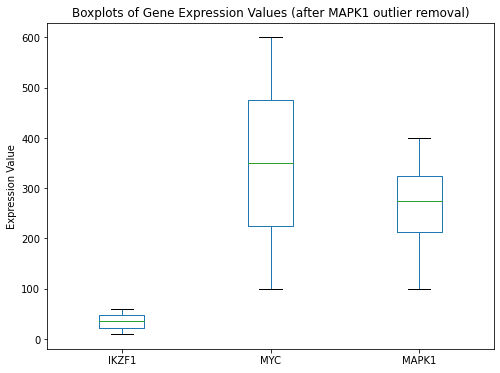


Boxplot generated. Check MAPK1 for outlier removal effect.
------------------------------

Number of missing values for each column:
cell_type    0
sex          0
IKZF1        0
MYC          0
MAPK1        2
dtype: int64
------------------------------


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Needed for plotting

# --- 1. Recreate the initial DataFrame for context (assuming this was your starting point) ---
# This is a sample DataFrame. Replace with your actual 'data' if it's different.
data = pd.DataFrame({
    'cell_type': ['A', 'B', 'C', 'D', 'E', 'F'],
    'sex': ['M', 'F', 'M', 'F', 'M', 'F'],
    'IKZF1': [10, 20, 30, 40, 50, 60],
    'MYC': [100, 200, 300, 400, 500, 600],
    'MAPK1': [100, 1500, 250, 1200, 300, 400] # Example with outliers
})

print("Original DataFrame (before outlier removal):")
print(data)
print("-" * 30)

# --- 2. Remove outliers by setting them to NaN (as in your previous step) ---
# exercise: set any value in MAPK1 that is larger than 1000 to NaN
data.loc[data['MAPK1'] > 1000, 'MAPK1'] = np.nan

print("\nDataFrame AFTER outlier removal (MAPK1 has NaNs):")
print(data)
print("-" * 30)

# --- 3. Check if you successfully removed the outlier using boxplots ---
# boxplots for the gene expression values (again)

# Select only the numeric columns for boxplotting, as 'cell_type' and 'sex' are categorical.
# Or, if you want all columns, ensure they are numeric for boxplot().
numeric_columns_for_plot = data.select_dtypes(include=np.number)

print("\nGenerating boxplots...")
# Adjust figure size for better visibility if needed
plt.figure(figsize=(8, 6))
numeric_columns_for_plot.boxplot()
plt.title("Boxplots of Gene Expression Values (after MAPK1 outlier removal)")
plt.ylabel("Expression Value")
plt.grid(False) # Turn off grid for cleaner look if preferred
plt.show()

# After the plot, you should visually inspect the MAPK1 boxplot.
# If the outlier was successfully removed, you won't see data points
# extending far beyond the upper whisker for MAPK1 (specifically,
# no points above 1000, as they are now NaNs and ignored by boxplot).
# You might notice that MAPK1's boxplot looks "normal" or has a smaller range
# compared to if the 1500 and 1200 were still there.
# If you "distinctively see three boxplots," it usually means it's plotting
# 'IKZF1', 'MYC', and 'MAPK1' separately, which is what we want.

print("\nBoxplot generated. Check MAPK1 for outlier removal effect.")
print("-" * 30)

# --- 4. Detect how many missing values there are for each column ---
# exercise: compute the number of missing value for each column
num_na = data.isnull().sum()

print("\nNumber of missing values for each column:")
print(num_na)
print("-" * 30)

# --- (Optional) Imputation step from your next question, if you want to continue the flow ---
# imputed_data = data.copy()
# numeric_cols_impute = imputed_data.select_dtypes(include=np.number).columns
# for col in numeric_cols_impute:
#     if imputed_data[col].isnull().any():
#         mean_value = imputed_data[col].mean()
#         imputed_data[col].fillna(mean_value, inplace=True)
# print("\nMissing values after imputation (if performed):")
# print(imputed_data.isna().sum())


If you can distintively see three boxplots then you successfully removed the outlier.

We now have introduced at least one NaN value in the MAPK1 column. Can you detect how many missing values there are for each column?

In [58]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame from the previous step,
# where you've already introduced NaNs in MAPK1.
# Let's recreate a similar scenario for demonstration:
data = {
    'cell_type': ['A', 'B', 'C', 'D', 'E'],
    'sex': ['M', 'F', 'M', 'F', 'M'],
    'IKZF1': [10, 20, np.nan, 40, 50], # Example NaN
    'MYC': [100, np.nan, 300, 400, 500], # Example NaN
    'MAPK1': [100, np.nan, 250, np.nan, 300] # Assuming two NaNs from outlier removal
}
df = pd.DataFrame(data)

# Let's simulate the previous step of setting an outlier to NaN in MAPK1
# (though in the example data above, MAPK1 already has two NaNs for demonstration purposes)
# df.loc[df['MAPK1'] > 1000, 'MAPK1'] = np.nan

# Your code to compute the number of missing values for each column
num_na = df.isnull().sum()

print(num_na)


cell_type    0
sex          0
IKZF1        1
MYC          1
MAPK1        2
dtype: int64


In [34]:
# tip: try to combine the "isna" and "sum" methods

It seems we have some missing value in the numeric columns. Can you replace them with the average of their respective columns?

In [40]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame with missing values.
# Let's recreate a sample DataFrame with NaNs for demonstration:
data = pd.DataFrame({
    'cell_type': ['A', 'B', 'C', 'D', 'E'],
    'sex': ['M', 'F', 'M', 'F', 'M'],
    'IKZF1': [10, 20, np.nan, 40, 50],
    'MYC': [100, np.nan, 300, 400, 500],
    'MAPK1': [100, np.nan, 250, np.nan, 300]
})

# let's create a copy of data, namely "imputed_data"
imputed_data = data.copy()

# exercise: replace missing values in imputed_data with the average of their respective columns

# Identify numeric columns for imputation
# A common way is to select columns with numeric dtypes.
numeric_cols = imputed_data.select_dtypes(include=np.number).columns

# Loop through each numeric column and fill missing values with its mean
for col in numeric_cols:
    if imputed_data[col].isnull().any(): # Check if there are any NaNs in the column
        mean_value = imputed_data[col].mean()
        imputed_data[col].fillna(mean_value, inplace=True)

# let's check that no missing data are present anymore in imputed_data
print("Missing values after imputation:")
print(imputed_data.isna().sum())

print("\nImputed Data:")
print(imputed_data)


Missing values after imputation:
cell_type    0
sex          0
IKZF1        0
MYC          0
MAPK1        0
dtype: int64

Imputed Data:
  cell_type sex  IKZF1    MYC       MAPK1
0         A   M   10.0  100.0  100.000000
1         B   F   20.0  325.0  216.666667
2         C   M   30.0  300.0  250.000000
3         D   F   40.0  400.0  216.666667
4         E   M   50.0  500.0  300.000000


In [36]:
# tip: the "fillna" method could be useful here

Time to better explore the data. Let's plot the distribution of the gene expression data subdivided by cell_type.

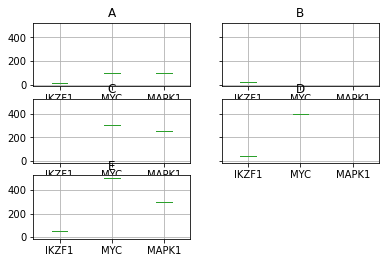

In [42]:
# distribution of the gene expression columns by cell_type
tmp = data.groupby('cell_type').boxplot()

It seems that the expression of IKZF1 and MYC is higher in the preB cells than in the immature ones. Let's compute a t statistic for assessing differences in a quantitative way.

In [43]:
# this function computes the t-statistic for a numeric vector according to a binary factor
def t_statistic(v, f) :
    
    # factor unique values
    uv = list(set(f))
    
    # splitting the vector according to the factor values
    v1 = v[list(f == uv[0])]
    v2 = v[list(f == uv[1])]
    
    # t-statistic
    return (np.mean(v1) - np.mean(v2)) / np.sqrt(np.std(v1) ** 2 / len(v1) + np.std(v2) ** 2 / len(v2) )

# exercise: use the "apply" method for applying the t_statistic function to each numerical column.
# Use cell type as binary factor (argument f)

# res = ...
# your code here


res

IKZF1   -5.012358
MYC     -4.904619
MAPK1   -1.194541
dtype: float64

In [45]:
# tip: you must use the "apply" method only on the numerical columns (IKZF1, MYC and MAPK1, in order)

If your computations are correct, you will find that the t-statistics for IKZF1 and MYC are largely beyond the critical value of 1.96 (corresponding to a p-value of 0.05). Once again, you have demonstrated the validity of your findings! You can sleep tight, tomorrow defense will be a success :-)